In [1]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import numpy as np
from skimage.feature import canny

In [2]:
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/*{model}/{scen}/*/BOM-BARPA-R/v1/{time}/{var}/*{year}01-{year}12.nc"

In [76]:
t=iris.load(path.format(model="ERA5",scen="evaluation",time="6hr",var="ta850",year=1980))
q=iris.load(path.format(model="ERA5",scen="evaluation",time="1hr",var="huss",year=1980),'specific_humidity')
u=iris.load(path.format(model="ERA5",scen="evaluation",time="6hr",var="ua850",year=1980))
z=iris.load(path.format(model="ERA5",scen="evaluation",time="6hr",var="zg850",year=1980))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ta850' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua850' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'zg850' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


In [21]:
q

[<iris 'Cube' of specific_humidity / (1) (time: 8784; latitude: 436; longitude: 777)>]

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


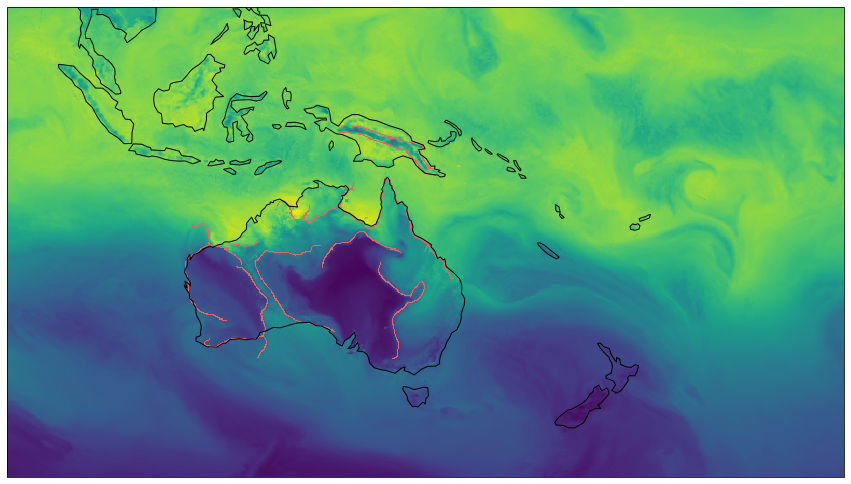

In [39]:
C=canny(q[0][24*11*30].data,3,0.001,0.005)
C=q[0][0].copy(data=np.ma.masked_array(C,mask=1-C))

plt.figure(figsize=(15,15))
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(q[0][24*11*30])
ax.coastlines()
iplt.pcolormesh(C,cmap='magma',vmin=-1,vmax=2)

In [108]:
C=[canny(t[0][2::4][i].data,3,2,6,1-t[0][2::4][i].data.mask) for i in range(366)]
C=np.array(C)
C=t[0][::4].copy(data=C)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


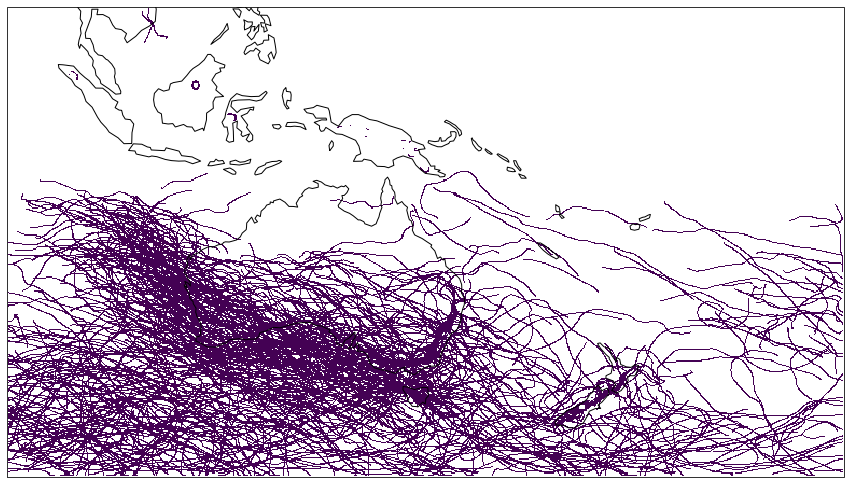

In [41]:

plt.figure(figsize=(15,15))
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(C.collapsed('time',iris.analysis.MEAN))
ax.coastlines()

In [69]:
t[0][::4]


<iris 'Cube' of air_temperature / (K) (time: 366; latitude: 436; longitude: 777)>

In [ ]:
Q=[canny(q[0][::4][i].data,0.0005,0.002,8,1-t[0][i].data.mask) for i in range(366)]
Q=np.array(q)
Q=t[0][::4].copy(data=np.ma.masked_array(C,mask=1-C))

In [33]:
q[0][24*11*30].data.max()

0.022151291

In [44]:
C.rename("Fronts")
C.units=1

In [56]:
iris.save(C,"fronts_1980.nc",zlib=True,packing='i2')

In [59]:
Cm= C.copy(data = np.ma.masked_array(C.data,1-C.data))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warning

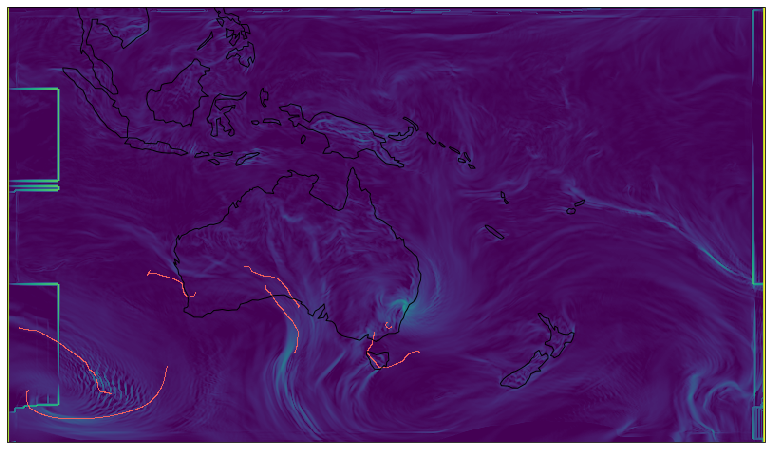

In [96]:

i=9
plt.figure(figsize=(15,8))
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(u[0][i*4],vmin=-30,vmax=30,cmap='PiYG')
iplt.pcolormesh(L[3][i],norm=LogNorm(vmin=1,vmax=100))
ax.coastlines()
iplt.pcolormesh(Cm[i],cmap='magma',vmin=-1,vmax=2)

In [70]:
u

[<iris 'Cube' of eastward_wind / (m s-1) (time: 1464; latitude: 436; longitude: 777)>]

In [79]:
L = iris.load("/scratch/tp28/eh6215/Lagrangian/ACCESS-CM2_historical_198001.nc")

In [80]:
L

Eigenvector Y (unknown),time,latitude,longitude
Shape,31,458,798
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Ratio (unknown),time,latitude,longitude
Shape,31,458,798
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-


In [100]:
from matplotlib.colors import LogNorm
from scipy.ndimage import convolve 

In [104]:
CC = convolve(C.data,np.ones((1,10,10)),mode='constant', cval=0)[:,::10,::10] > 0

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


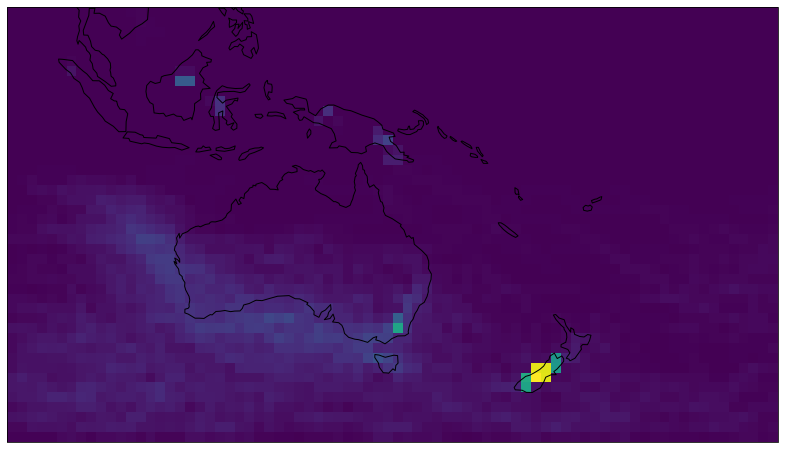

In [107]:

i=9
plt.figure(figsize=(15,8))
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(C[0][::10,::10].copy(data=CC.sum(axis=0)))
ax.coastlines()